## Importing Libraries

In [1]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



ModuleNotFoundError: No module named 'tensorflow'

In [2]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Data Preprocessing

## Traning Image Preprocessing

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 18470 files belonging to 8 classes.


## Validation Image Preprocessing


In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)




Found 4086 files belonging to 8 classes.


In [6]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 8), dtype=tf.float32, name=None))>

In [7]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break
    

tf.Tensor(
[[[[194.     208.     255.    ]
   [194.     208.     255.    ]
   [194.     208.     255.    ]
   ...
   [190.     199.     254.    ]
   [190.     199.     254.    ]
   [190.     199.     254.    ]]

  [[194.     208.     255.    ]
   [194.     208.     255.    ]
   [194.     208.     255.    ]
   ...
   [190.     199.     254.    ]
   [190.     199.     254.    ]
   [190.     199.     254.    ]]

  [[194.     208.     255.    ]
   [194.     208.     255.    ]
   [194.     208.     255.    ]
   ...
   [190.     199.     254.    ]
   [190.     199.     254.    ]
   [190.     199.     254.    ]]

  ...

  [[223.75   237.75   250.75  ]
   [223.5    236.5    252.5   ]
   [222.5    235.5    251.5   ]
   ...
   [148.     159.     238.    ]
   [149.     160.     239.    ]
   [149.     160.     239.    ]]

  [[224.75   238.75   251.75  ]
   [224.     238.     251.    ]
   [223.25   236.25   252.25  ]
   ...
   [149.     160.     239.    ]
   [148.     159.     238.    ]
   [148.   

## To avoid Overshooting
1.Choose small learning rate default 0.001 here we have taken 0.0001
2.There may be chance of underfitting so increase number of neuron
3.Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [9]:
model = Sequential()

## Building Convolution Layer

In [10]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [11]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [12]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [13]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [14]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [15]:
model.add(Dropout(0.25)) # To avoid Overfitting

In [16]:
model.add(Flatten())

In [17]:
model.add(Dense(units=1700,activation='relu'))

In [18]:
model.add(Dropout(0.4))

In [19]:
#Output Layer
model.add(Dense(units=8,activation='softmax'))

## Compiling Model

In [20]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [23]:
###Check if GPU is available

## Model Traning

In [24]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
578/578 [==============================] - 131s 214ms/step - loss: 1.0699 - accuracy: 0.5801 - val_loss: 0.7056 - val_accuracy: 0.7572
Epoch 2/10
578/578 [==============================] - 72s 124ms/step - loss: 0.4538 - accuracy: 0.8314 - val_loss: 0.3033 - val_accuracy: 0.8943
Epoch 3/10
578/578 [==============================] - 72s 124ms/step - loss: 0.2455 - accuracy: 0.9124 - val_loss: 0.2973 - val_accuracy: 0.8962
Epoch 4/10
578/578 [==============================] - 158s 273ms/step - loss: 0.1581 - accuracy: 0.9432 - val_loss: 0.1877 - val_accuracy: 0.9339
Epoch 5/10
578/578 [==============================] - 177s 305ms/step - loss: 0.0991 - accuracy: 0.9656 - val_loss: 0.0982 - val_accuracy: 0.9667
Epoch 6/10
578/578 [==============================] - 171s 295ms/step - loss: 0.0734 - accuracy: 0.9752 - val_loss: 0.0967 - val_accuracy: 0.9701
Epoch 7/10
578/578 [==============================] - 170s 294ms/step - loss: 0.0587 - accuracy: 0.9792 - val_loss: 0.0917 - v

## Evaluating Model

In [25]:
#Training set Accuracy
train_loss, train_acc = model.evaluate(training_set)

578/578 [==============================] - 54s 92ms/step - loss: 0.0082 - accuracy: 0.9978


In [26]:
print(train_loss,train_acc)

0.008218840695917606 0.997834324836731


In [27]:
#Model on validation set
val_loss, val_acc = model.evaluate(validation_set)

128/128 [==============================] - 15s 109ms/step - loss: 0.0533 - accuracy: 0.9887


In [28]:
print(val_loss,val_acc)

0.05328547954559326 0.9887420535087585


## Saving Model

In [29]:
# First check if the model has been trained properly
print(f"Training Accuracy: {train_acc:.4f}")



Training Accuracy: 0.9978


In [30]:
# Save the model with a clear version number or timestamp
import datetime
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
model_path = f'trained_model_v{timestamp}.keras'
model.save(model_path)

# Verify the save was successful
print(f"Model saved successfully at: {model_path}")

Model saved successfully at: trained_model_v20250412_035536.keras


In [31]:
import tensorflow as tf

# Load the saved model
model = tf.keras.models.load_model('trained_model.keras')

# Verify the model architecture
model.summary()

# If you want to verify the model works, you can evaluate it
test_loss, test_acc = model.evaluate(test_set)
print(f"Test accuracy: {test_acc:.4f}")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

NameError: name 'test_set' is not defined

In [ ]:
# Then save the model
## model.save('trained_model.keras')

In [ ]:
training_history.history

{'loss': [1.3750864267349243,
  0.8251698613166809,
  0.6113005876541138,
  0.424752414226532,
  0.3131627142429352,
  0.2540685534477234,
  0.18909168243408203,
  0.16790372133255005,
  0.11823796480894089,
  0.11727672070264816],
 'accuracy': [0.453275591135025,
  0.672874927520752,
  0.7588521838188171,
  0.8413643836975098,
  0.8815376162528992,
  0.9104493856430054,
  0.9334055185317993,
  0.9430427551269531,
  0.9604764580726624,
  0.9605847597122192],
 'val_loss': [0.9535936713218689,
  0.6794667840003967,
  0.46543821692466736,
  0.3424772024154663,
  0.2838451862335205,
  0.2369638979434967,
  0.21778756380081177,
  0.1808086782693863,
  0.09965731203556061,
  0.12934304773807526],
 'val_accuracy': [0.6603034734725952,
  0.7376407384872437,
  0.8316201567649841,
  0.8702887892723083,
  0.8932941555976868,
  0.9187469482421875,
  0.921194314956665,
  0.9412628412246704,
  0.9672051072120667,
  0.9530102610588074]}

In [ ]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [ ]:
training_history.history['val_accuracy']

[0.6603034734725952,
 0.7376407384872437,
 0.8316201567649841,
 0.8702887892723083,
 0.8932941555976868,
 0.9187469482421875,
 0.921194314956665,
 0.9412628412246704,
 0.9672051072120667,
 0.9530102610588074]

### Accuracy Visualization

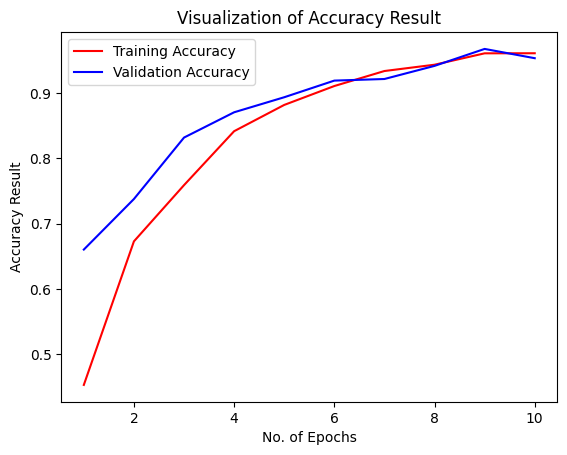

In [ ]:
epochs = [i for i in range (1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red', label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue', label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

## Metrics for model evaluation

In [ ]:
class_name = validation_set.class_names
class_name

['Anthracnose',
 'algal leaf',
 'bird eye spot',
 'brown blight',
 'gray light',
 'healthy',
 'red leaf spot',
 'white spot']

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2043 files belonging to 8 classes.


In [ ]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

64/64 [==============================] - 4s 57ms/step


(array([[8.4519327e-01, 2.5145125e-04, 1.4653005e-01, ..., 2.4347981e-04,
         2.8507510e-04, 5.5473356e-04],
        [8.0348015e-02, 1.5428202e-04, 3.6592231e-04, ..., 7.9093939e-01,
         1.0204238e-04, 5.2754162e-04],
        [4.4510361e-02, 3.6644703e-03, 6.3409581e-04, ..., 5.6171995e-01,
         6.9902401e-04, 2.7057163e-03],
        ...,
        [5.3266808e-06, 3.0478556e-03, 1.4198298e-06, ..., 1.8973944e-06,
         9.6642652e-06, 6.1969154e-02],
        [8.7135653e-08, 2.0155024e-07, 2.8255210e-08, ..., 1.0673879e-08,
         9.8343548e-07, 5.6345356e-03],
        [1.7210596e-05, 2.8348420e-02, 1.9964916e-06, ..., 5.6986109e-06,
         4.3518463e-05, 6.9013171e-02]], dtype=float32),
 (2043, 8))

In [ ]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [ ]:
predicted_categories

<tf.Tensor: shape=(2043,), dtype=int64, numpy=array([0, 5, 5, ..., 3, 3, 3], dtype=int64)>

In [ ]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(2043, 8), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [ ]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(2043,), dtype=int64, numpy=array([0, 0, 0, ..., 7, 7, 7], dtype=int64)>

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

               precision    recall  f1-score   support

  Anthracnose       0.98      0.90      0.94       299
   algal leaf       1.00      0.94      0.97       232
bird eye spot       0.95      0.98      0.97       294
 brown blight       0.88      0.90      0.89       207
   gray light       0.86      0.93      0.89       210
      healthy       0.98      1.00      0.99       544
red leaf spot       0.97      0.99      0.98       231
   white spot       0.95      0.77      0.85        26

     accuracy                           0.95      2043
    macro avg       0.95      0.93      0.93      2043
 weighted avg       0.95      0.95      0.95      2043



In [ ]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[268,   0,  13,   1,   8,   9,   0,   0],
       [  0, 218,   0,   4,   6,   1,   2,   1],
       [  6,   0, 288,   0,   0,   0,   0,   0],
       [  0,   0,   0, 187,  17,   0,   3,   0],
       [  0,   0,   1,  14, 195,   0,   0,   0],
       [  0,   0,   0,   0,   1, 542,   1,   0],
       [  0,   0,   0,   2,   0,   0, 229,   0],
       [  0,   0,   0,   5,   1,   0,   0,  20]], dtype=int64)

### confusion_matrix visualiation

<Axes: >

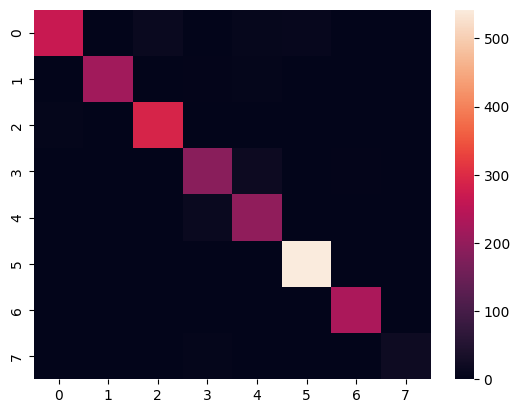

In [ ]:
sns.heatmap(cm)